<a href="https://colab.research.google.com/github/Kufzuk2/Comp_math/blob/main/sem2_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [2]:
def adams_methods(f, y0, t0, tn, h, orders):
    """
    Решает ОДУ явными методами Адамса разных порядков
    :param f: функция правой части ОДУ dy/dt = f(t, y)
    :param y0: начальное значение y(t0)
    :param t0: начальное время
    :param tn: конечное время
    :param h: шаг интегрирования
    :param orders: список порядков методов (2-4)
    :return: словарь с решениями для каждого порядка
    """
    t_values = np.arange(t0, tn + h, h)
    solutions = {order: np.zeros_like(t_values) for order in orders}
    n = len(t_values)

    for order in orders:
        # Используем Рунге-Кутта 4 порядка для разгона
        solutions[order][0] = y0
        for i in range(1, order):
            t = t_values[i-1]
            y = solutions[order][i-1]
            k1 = f(t, y)
            k2 = f(t + h/2, y + h*k1/2)
            k3 = f(t + h/2, y + h*k2/2)
            k4 = f(t + h, y + h*k3)
            solutions[order][i] = y + h * (k1 + 2*k2 + 2*k3 + k4) / 6

        # Применяем метод Адамса соответствующего порядка
        for i in range(order, n):
            t_prev = t_values[i-1]
            y_prev = solutions[order][i-1]

            if order == 2:
                # Адамс-Башфорт 2 порядка
                f_prev = f(t_prev, y_prev)
                f_prev_prev = f(t_values[i-2], solutions[order][i-2])
                solutions[order][i] = y_prev + h * (3*f_prev - f_prev_prev) / 2

            elif order == 3:
                # Адамс-Башфорт 3 порядка
                f_prev = f(t_prev, y_prev)
                f_prev_prev = f(t_values[i-2], solutions[order][i-2])
                f_prev_prev_prev = f(t_values[i-3], solutions[order][i-3])
                solutions[order][i] = y_prev + h * (23*f_prev - 16*f_prev_prev + 5*f_prev_prev_prev) / 12

            elif order == 4:
                # Адамс-Башфорт 4 порядка
                f_prev = f(t_prev, y_prev)
                f_prev_prev = f(t_values[i-2], solutions[order][i-2])
                f_prev_prev_prev = f(t_values[i-3], solutions[order][i-3])
                f_prev_prev_prev_prev = f(t_values[i-4], solutions[order][i-4])
                solutions[order][i] = y_prev + h * (55*f_prev - 59*f_prev_prev + 37*f_prev_prev_prev - 9*f_prev_prev_prev_prev) / 24

    return t_values, solutions

In [3]:
def backward_differentiation_methods(f, y0, t0, tn, h, orders):
    """
    Решает ОДУ явными методами Формулы Дифференцирования Назад разных порядков
    :param f: функция правой части ОДУ dy/dt = f(t, y)
    :param y0: начальное значение y(t0)
    :param t0: начальное время
    :param tn: конечное время
    :param h: шаг интегрирования
    :param orders: список порядков методов (2-4)
    :return: словарь с решениями для каждого порядка
    """
    t_values = np.arange(t0, tn + h, h)
    solutions = {order: np.zeros_like(t_values) for order in orders}
    n = len(t_values)

    for order in orders:
        # Используем Рунге-Кутта 4 порядка для разгона
        solutions[order][0] = y0
        for i in range(1, order):
            t = t_values[i-1]
            y = solutions[order][i-1]
            k1 = f(t, y)
            k2 = f(t + h/2, y + h*k1/2)
            k3 = f(t + h/2, y + h*k2/2)
            k4 = f(t + h, y + h*k3)
            solutions[order][i] = y + h * (k1 + 2*k2 + 2*k3 + k4) / 6

        # Применяем метод Формулы Дифференцирования Назад соответствующего порядка
        for i in range(order, n):
            if order == 2:
                # BDF2
                solutions[order][i] = (4*solutions[order][i-1] - solutions[order][i-2] + 2*h*f(t_values[i], 0)) / 3
                # Итеративно уточняем решение
                for _ in range(3):  # Несколько итераций для улучшения точности
                    solutions[order][i] = (4*solutions[order][i-1] - solutions[order][i-2] + 2*h*f(t_values[i], solutions[order][i])) / 3

            elif order == 3:
                # BDF3
                solutions[order][i] = (18*solutions[order][i-1] - 9*solutions[order][i-2] + 2*solutions[order][i-3] + 6*h*f(t_values[i], 0)) / 11
                # Итеративно уточняем решение
                for _ in range(3):
                    solutions[order][i] = (18*solutions[order][i-1] - 9*solutions[order][i-2] + 2*solutions[order][i-3] + 6*h*f(t_values[i], solutions[order][i])) / 11

            elif order == 4:
                # BDF4
                solutions[order][i] = (48*solutions[order][i-1] - 36*solutions[order][i-2] + 16*solutions[order][i-3] - 3*solutions[order][i-4] + 12*h*f(t_values[i], 0)) / 25
                # Итеративно уточняем решение
                for _ in range(3):
                    solutions[order][i] = (48*solutions[order][i-1] - 36*solutions[order][i-2] + 16*solutions[order][i-3] - 3*solutions[order][i-4] + 12*h*f(t_values[i], solutions[order][i])) / 25

    return t_values, solutions

In [4]:
def runge_kutta_methods(f, y0, t0, tn, h, orders):
    """
    Решает ОДУ методами Рунге-Кутта разных порядков
    :param f: функция правой части ОДУ dy/dt = f(t, y)
    :param y0: начальное значение y(t0)
    :param t0: начальное время
    :param tn: конечное время
    :param h: шаг интегрирования
    :param orders: список порядков методов (1-4)
    :return: словарь с решениями для каждого порядка
    """
    t_values = np.arange(t0, tn + h, h)
    solutions = {order: np.zeros_like(t_values) for order in orders}

    for order in orders:
        solutions[order][0] = y0
        for i in range(1, len(t_values)):
            t = t_values[i-1]
            y = solutions[order][i-1]

            if order == 1:  # Метод Эйлера (Рунге-Кутта 1 порядка)
                k1 = f(t, y)
                solutions[order][i] = y + h * k1

            elif order == 2:  # Метод Хойна (Рунге-Кутта 2 порядка)
                k1 = f(t, y)
                k2 = f(t + h, y + h * k1)
                solutions[order][i] = y + h * (k1 + k2) / 2

            elif order == 3:  # Метод Рунге-Кутта 3 порядка
                k1 = f(t, y)
                k2 = f(t + h/2, y + h*k1/2)
                k3 = f(t + h, y - h*k1 + 2*h*k2)
                solutions[order][i] = y + h * (k1 + 4*k2 + k3) / 6

            elif order == 4:  # Классический метод Рунге-Кутта 4 порядка
                k1 = f(t, y)
                k2 = f(t + h/2, y + h*k1/2)
                k3 = f(t + h/2, y + h*k2/2)
                k4 = f(t + h, y + h*k3)
                solutions[order][i] = y + h * (k1 + 2*k2 + 2*k3 + k4) / 6

    return t_values, solutions

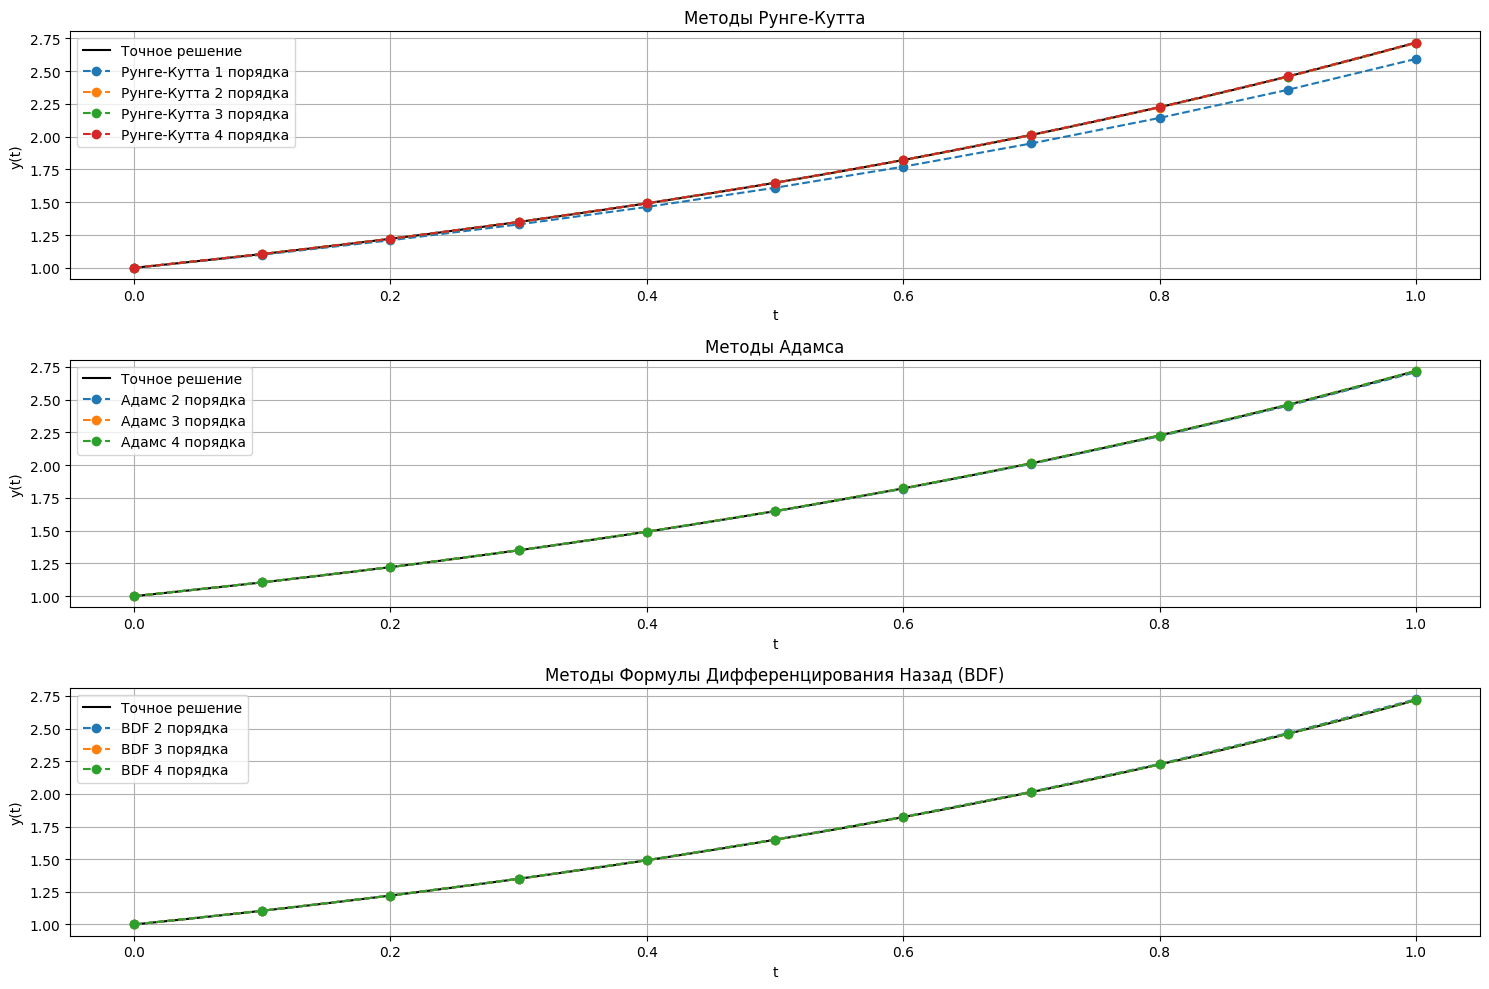

In [5]:
# Определяем функцию правой части ОДУ dy/dt = y
def f(t, y):
    return y

# Параметры задачи
y0 = 1  # y(0) = 1
t0 = 0
tn = 1
h = 0.1

# Точное решение для сравнения
exact_solution = lambda t: np.exp(t)

# Вычисляем решения разными методами
t_rk, sol_rk = runge_kutta_methods(f, y0, t0, tn, h, orders=[1, 2, 3, 4])
t_adams, sol_adams = adams_methods(f, y0, t0, tn, h, orders=[2, 3, 4])
t_bdf, sol_bdf = backward_differentiation_methods(f, y0, t0, tn, h, orders=[2, 3, 4])

# Вычисляем точное решение
t_exact = np.linspace(t0, tn, 100)
y_exact = exact_solution(t_exact)

# Визуализация результатов
plt.figure(figsize=(15, 10))

# Графики для методов Рунге-Кутта
plt.subplot(3, 1, 1)
plt.plot(t_exact, y_exact, 'k-', label='Точное решение')
for order in [1, 2, 3, 4]:
    plt.plot(t_rk, sol_rk[order], 'o--', label=f'Рунге-Кутта {order} порядка')
plt.title('Методы Рунге-Кутта')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

# Графики для методов Адамса
plt.subplot(3, 1, 2)
plt.plot(t_exact, y_exact, 'k-', label='Точное решение')
for order in [2, 3, 4]:
    plt.plot(t_adams, sol_adams[order], 'o--', label=f'Адамс {order} порядка')
plt.title('Методы Адамса')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

# Графики для методов BDF
plt.subplot(3, 1, 3)
plt.plot(t_exact, y_exact, 'k-', label='Точное решение')
for order in [2, 3, 4]:
    plt.plot(t_bdf, sol_bdf[order], 'o--', label=f'BDF {order} порядка')
plt.title('Методы Формулы Дифференцирования Назад (BDF)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

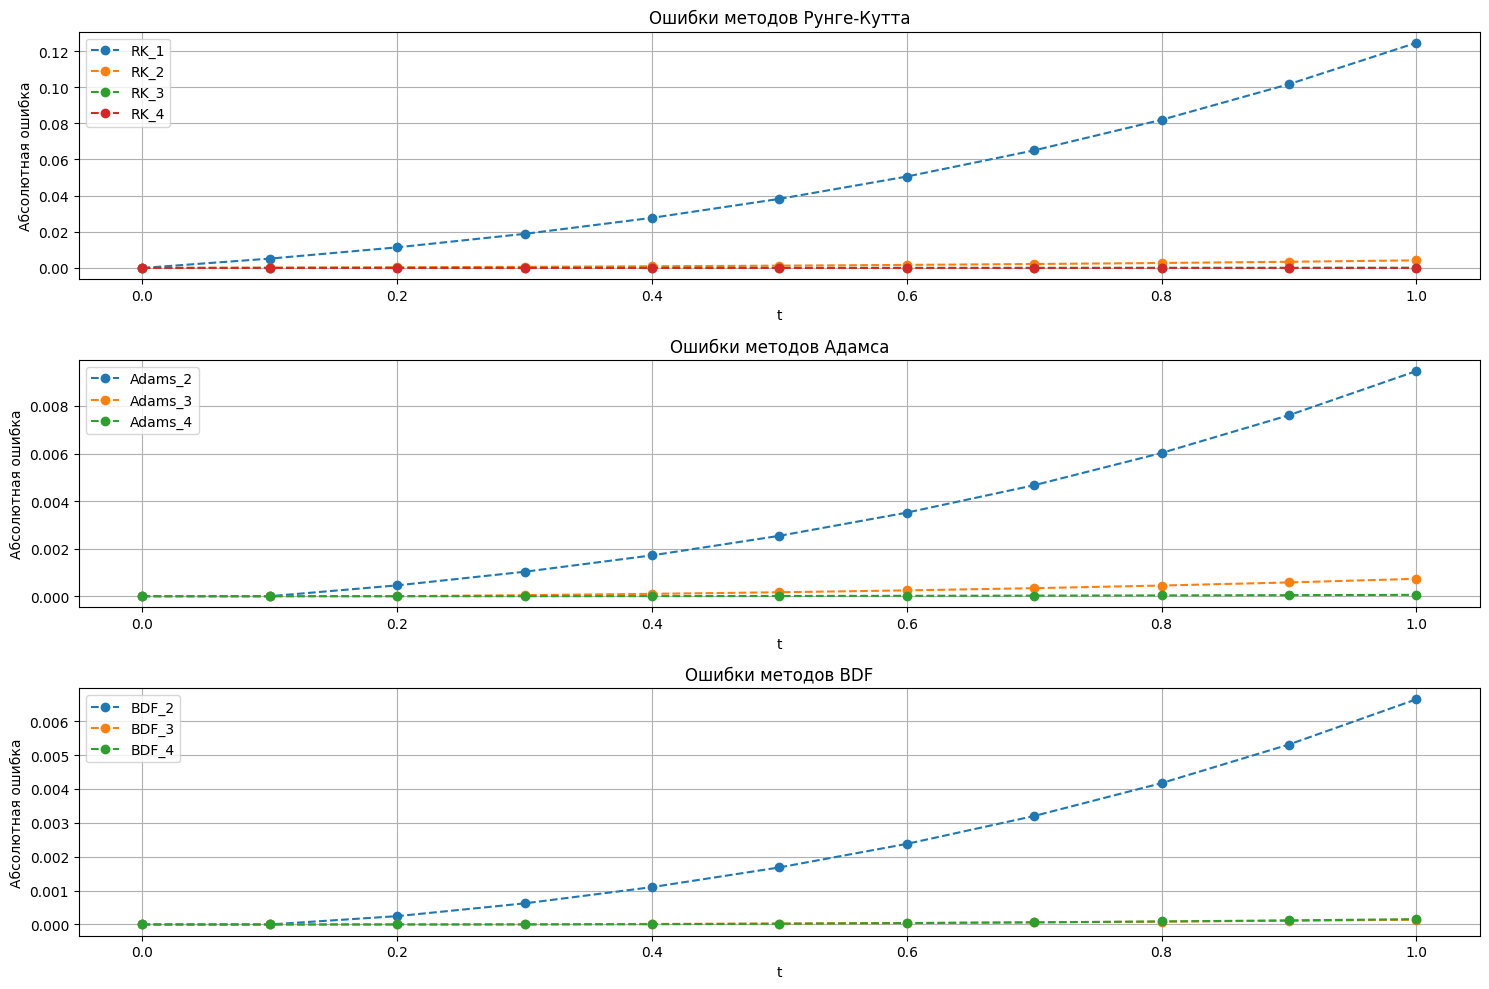

In [6]:
# Вычисление ошибок для разных методов
errors = {}

# Для методов Рунге-Кутта
for order in [1, 2, 3, 4]:
    exact = exact_solution(t_rk)
    approx = sol_rk[order]
    errors[f'RK_{order}'] = np.abs(exact - approx)

# Для методов Адамса
for order in [2, 3, 4]:
    exact = exact_solution(t_adams)
    approx = sol_adams[order]
    errors[f'Adams_{order}'] = np.abs(exact - approx)

# Для методов BDF
for order in [2, 3, 4]:
    exact = exact_solution(t_bdf)
    approx = sol_bdf[order]
    errors[f'BDF_{order}'] = np.abs(exact - approx)

# Визуализация ошибок
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
for method in ['RK_1', 'RK_2', 'RK_3', 'RK_4']:
    plt.plot(t_rk, errors[method], 'o--', label=method)
plt.title('Ошибки методов Рунге-Кутта')
plt.xlabel('t')
plt.ylabel('Абсолютная ошибка')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
for method in ['Adams_2', 'Adams_3', 'Adams_4']:
    plt.plot(t_adams, errors[method], 'o--', label=method)
plt.title('Ошибки методов Адамса')
plt.xlabel('t')
plt.ylabel('Абсолютная ошибка')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
for method in ['BDF_2', 'BDF_3', 'BDF_4']:
    plt.plot(t_bdf, errors[method], 'o--', label=method)
plt.title('Ошибки методов BDF')
plt.xlabel('t')
plt.ylabel('Абсолютная ошибка')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()